**Autores:**
- David Moreno Vituri
- Ricardo Sánchez Olivares
- Íñigo Alegre Jiménez

# Objetivo: 

El objetivo de este notebook es la creación de los distintos dataset y tablas que nos ayudaran a analizar, estudiar, modelar y segmentar todos los clientes que posee **easyMoney**.

- Comenzaremos importando los distintos datasets que disponemos y haremos un breve EDA sobre los mismos
- Construiremos una tabla de excel necesaria para el estudio de ventas mendiante la herramienta de PowerBi
- Crearemos una tabla de bajas la que nos ayudará a visualizar las inscripciones y bajas de cada uno de los productos
- Elaboraremos los distintos datasets balanceados para alimentar a los modelos de propensión a compra, los cuales nos ayudarán a identificar aquellos clientes con más probabilidades de comprar cierto producto
- Elaboraremos variables explicativas nuevas a partir de las que ya tenemos para segmentar de mejor manera el tipo de clientes que tenemos a través de un algoritmo de clusterización como es KMeans.
- Por último, elaboraremos distintas tablas que agrupen toda la información de clientes que poseemos para ciertos rangos temporales.

<a id='index'></a>
## Índice

[Importación de librerías y dataframes](#importacion_librerias)<br>

[Construcción tabla PowerBI(sales_analysis)](#sales_analysis)<br>

[Creación de tabla bajas](#bajas)<br>

**Dataset balanceados**

[Datasets balanceados de producto a predecir](#balanceo)<br>
[Dataset balanceado debit_card](#debit_card)<br>
[Dataset balanceados pension_plan](#pension_plan)<br>
[Dataset balanceado long_term_deposit](#long_term_deposit)<br>

**Variables extra**

[Creación de variables extra](#extra)<br>

**Tablas info_clientes**

[Creación tabla info_clientes para debit_card](#info_debit)<br>


<a id='importacion_librerias'></a>
# Importación de librerías y dataframes
[Volver al índice](#index)

En este apartado hacemos la importación de las principales librerías y los datasets necesarios para llevar a cabo todo el estudio de clientes y ventas de **easyMoney**.

In [1]:
# comenzamos importando las librerías necesarias 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cargamos todas las tablas de las que disponemos sin contar con la primera columna de cada una de ellas que apenas aporta información.

# tabla relativa a a las ventas
sales = pd.read_csv('sales.csv',usecols=lambda column: column != 'Unnamed: 0')

#tabla relativa a información sobre la actividad comercial de los clientes
customer_commercial_activity = pd.read_csv('customer_commercial_activity.csv',usecols=lambda column: column != 'Unnamed: 0')

#tabla que informa sobre los productos adquiridos cada mes por cada cliente
customer_products = pd.read_csv('customer_products.csv',usecols=lambda column: column != 'Unnamed: 0')

#tabla que aporta información personal de cada cliente como edad, region, país, género
customer_sociodemographics = pd.read_csv('customer_sociodemographics.csv',usecols=lambda column: column != 'Unnamed: 0')

# tabla que muestra los productos que están a la venta
products_description = pd.read_csv('product_description.csv',usecols=lambda column: column != 'Unnamed: 0')

## Breve EDA y procesamiento

In [3]:
print(f'Nuestros datos de ventas van desde el {sales['month_sale'].min()} hasta el {sales['month_sale'].max()}')

Nuestros datos de ventas van desde el 2018-02-01 hasta el 2019-05-01


In [4]:
print(f'Nuestros datos de clientes van desde el {customer_products['pk_partition'].min()} hasta el {customer_products['pk_partition'].max()}')

Nuestros datos de clientes van desde el 2018-01 hasta el 2019-05


In [5]:
# clientes que han comprado en cada mes
sales.groupby('month_sale')['cid'].nunique()

month_sale
2018-02-01    11992
2018-03-01     9405
2018-04-01     7974
2018-05-01     7685
2018-06-01     9321
2018-07-01    17644
2018-08-01    18740
2018-09-01    22452
2018-10-01    25167
2018-11-01    16441
2018-12-01    12018
2019-01-01     9991
2019-02-01     9083
2019-03-01     9161
2019-04-01     7724
2019-05-01     7896
Name: cid, dtype: int64

Vamos a entender como funcionan las tablas y la relación que hay entre las mismas.
Para ello hacemos un seguimiento de un cliente.

In [6]:
sales[sales['cid'] == 33620]

,pk_sale,cid,month_sale,product_ID,net_margin
0,6666,33620,2018-05-01,2335,952.9
123352,130018,33620,2018-04-01,4657,71.6


In [7]:
customer_products[customer_products['pk_cid'] == 33620]

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
729038,33620,2018-04,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1222826,33620,2018-05,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1474877,33620,2018-06,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1479606,33620,2018-07,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2168162,33620,2018-08,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2171534,33620,2018-09,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2943586,33620,2018-10,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2977186,33620,2018-11,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3628188,33620,2018-12,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
4029291,33620,2019-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


Observamos que la tabla customer products se actualiza cada mes con las compras realizadas en dicho mes. Vemos que el cliente puede decidir de contar con el servicio contratado cualquier mes.

In [8]:
def breve_eda(dataframe):
    print(dataframe.info())
    print(' \n Número de nulos por columna \n')
    print(dataframe.isna().sum())
    print('\n')
    print(dataframe.describe(include=np.number))
    print('\n')
    print(dataframe.describe(exclude=np.number))

### EDA Sales

In [9]:
breve_eda(sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   pk_sale     240773 non-null  int64  
 1   cid         240773 non-null  int64  
 2   month_sale  240773 non-null  object 
 3   product_ID  240773 non-null  int64  
 4   net_margin  240773 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 9.2+ MB
None
 
 Número de nulos por columna 

pk_sale       0
cid           0
month_sale    0
product_ID    0
net_margin    0
dtype: int64


             pk_sale           cid     product_ID     net_margin
count  240773.000000  2.407730e+05  240773.000000  240773.000000
mean   127052.000000  1.363934e+06    3945.408202     606.878164
std     69505.322519  1.751721e+05    1632.821700    1735.806089
min      6666.000000  1.589100e+04    1119.000000      25.000000
25%     66859.000000  1.301012e+06    2312.000000      61.400000
50%    1270

Únicamente tenemos las ventas históricas (al ser servicios el cliente se puede dar de baja en ellos)

Tras un rápido EDA observamos lo siguiente:

**Columnas**
- pk_sale ->	Identificador de venta
- cid ->        Identificador de cliente
- month_sale ->	Mes de venta. Mes en el que se contrata un producto.
- product_ID ->	Identificador de producto
- net_margin ->	Margen neto generado por la venta ($)

**Información**
- se trata de un dataframe sin nulos
- pese a ser numérica no debemos olvidar que product_ID se trata de una columna categórica
- debemos de pasar month_sale a tipo datetime


### EDA customer_commercial_activity

In [10]:
breve_eda(customer_commercial_activity)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 273.0+ MB
None
 
 Número de nulos por columna 

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64


             pk_cid  active_customer
count  5.962924e+06     5.962924e+06
mean   1.234930e+06     4.033845e-01
std    1.623020e+05     4.905767e-01
min    1.589100e+04     0.000000e+00
25%    1.112532e+06     0.000000e+00
50%    1.231097e+06     0.000000e+00
75%    1.352339e+06     1.000000e+00
max    1.553689e+06     1.000000e+00


       pk_partition entry_date entry_cha

In [11]:
customer_commercial_activity['entry_date'].min()

'2015-01'

In [12]:
# número total de clientes que se han tenido, observamos que es mayor que el total de ventas y mucho menor que el total de filas de la columna
# debido a que un cliente puede comprar varias veces y en cada mes se repiten todos los clientes del mes anterior que no han cancelado su 
# servicio con la empresa

customer_commercial_activity['pk_cid'].nunique()

456373

In [13]:
# número total de clientes el último mes

customer_commercial_activity[customer_commercial_activity['pk_partition'] == '2019-05']['pk_cid'].nunique()

442995

Tras un rápido EDA observamos lo siguiente:

**Columnas**
- pk_cid ->	          Identificador de cliente
- pk_partition ->	  Identificador de Partición. Mensualmente se ingesta en la tabla una partición con el estado de la base de clientes.
- entry_channel ->	  Canal de captación del cliente
- entry_date ->	      Fecha en la que realizó la primera contratación a través de easyMoney
- segment ->	      Segmento comercial del cliente
- active_customer ->  Indicador de actividad del cliente en la app EasyMoney


**Información**
- Debemos transformar la columna **active_customer** a tipo int
- cambiar el formato de la columna **segment**
- pasar a datetime la columna **entry_date** y de ahí sacar el año y el mes
- tenemos nulos en las columnas **entry_channel** y en **segment** (no encuentro ninguna relación posible para poder inferir estos valores)
- **entry_channel** tiene muchas categorías insignificantes


In [14]:
print(customer_commercial_activity['segment'].value_counts(),'\n')
print(customer_commercial_activity['entry_channel'].value_counts().head(10))

segment
03 - UNIVERSITARIO    3900166
02 - PARTICULARES     1830875
01 - TOP                97939
Name: count, dtype: int64 

entry_channel
KHE    3113947
KFC     890620
KHQ     590280
KAT     416084
KHK     230197
KHM     176591
KHN     108434
KFA      79020
KHD      75899
RED      60601
Name: count, dtype: int64


En los nulos tanto de **entry_channel** como en **segment** vamos a imputar categoría desconocido

In [15]:
customer_commercial_activity['entry_channel'] = np.where(customer_commercial_activity['entry_channel'].isna(),'Unknown',customer_commercial_activity['entry_channel'])
customer_commercial_activity['segment'] = np.where(customer_commercial_activity['segment'].isna(),'Unknown',customer_commercial_activity['segment'])

### EDA customer_products

In [16]:
breve_eda(customer_products)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 773.4+ MB
None
 
 Número de nulos por columna 

pk_cid                 0
pk_partition           0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securit

In [17]:
# observamos todos los registros de un cliente. Nos fijamos en que se observa su actividad y servicios contratados cada mes
# en este caso payroll,pension_plan y payroll_acount se mantienen una vez contratados mientras que em_acount solo dura un mes

customer_products[customer_products['pk_cid']==1528334]

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
3869312,1528334,2019-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4394821,1528334,2019-02,0,0,0,0,0,0,0,0,1.0,1.0,0,0,0,0,1
4722489,1528334,2019-03,0,0,0,0,0,0,0,1,1.0,1.0,1,0,1,0,0
5092825,1528334,2019-04,0,0,0,0,0,0,0,1,1.0,1.0,1,0,1,0,0
5698332,1528334,2019-05,0,0,0,0,0,0,0,1,1.0,1.0,1,1,1,0,0


Tras un rápido EDA observamos lo siguiente:

**Columnas**
- pk_cid ->	          Identificador de cliente
- pk_partition ->	  Identificador de Partición. Mensualmente se ingesta en la tabla una partición con el estado de la base de clientes.
- el resto de columnas son columnas tipo booleanas que indican si el cliente tiene contratado el producto en cuestión


**Información**
- debemos de pasar a tipo int las columnas **payroll** y **pension_plan** en las cuales tenemos nulos
- sin hacer un análisis en profundidad podemos observar que los artículos más contratados son: em_account, debit_card y payroll_account

In [18]:
print(customer_products['payroll'].value_counts(normalize=True,dropna=False),'\n')
print(customer_products['pension_plan'].value_counts(normalize=True,dropna=False))

payroll
0.0    0.965479
1.0    0.034511
NaN    0.000010
Name: proportion, dtype: float64 

pension_plan
0.0    0.963464
1.0    0.036526
NaN    0.000010
Name: proportion, dtype: float64


Vemos que el porcentaje de nulos en ambas categorías es ínfimo por lo que optamos por imputar la moda en ambas columnas.

In [19]:
customer_products['payroll'] = np.where(customer_products['payroll'].isna(),0,customer_products['payroll'])
customer_products['pension_plan'] = np.where(customer_products['pension_plan'].isna(),0,customer_products['pension_plan'])
customer_products['payroll'] = customer_products['payroll'].astype(int)
customer_products['pension_plan'] = customer_products['pension_plan'].astype(int)

### EDA customer_sociodemographics

In [20]:
breve_eda(customer_sociodemographics)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 363.9+ MB
None
 
 Número de nulos por columna 

pk_cid                0
pk_partition          0
country_id            0
region_code        2264
gender               25
age                   0
deceased              0
salary          1541104
dtype: int64


             pk_cid   region_code           age        salary
count  5.962924e+06  5.960660e+06  5.962924e+06  4.421820e+06
mean   1.234930e+06  2.581440e+01  2.976042e+01  1.155833e+05
std    1.623020e+05  1.359566e+01  1.198038e+01  2.000066e+05
min    1.589100e+04  1.000000e+00  2.000000e+00  1.202730e+03

Tras un rápido EDA observamos lo siguiente:

**Columnas**
- pk_cid ->	         Identificador de cliente
- pk_partition ->	 Identificador de Partición. Mensualmente se ingesta en la tabla una partición con el estado de la base de clientes.
- deceased ->	     Indicador de fallecimiento
- gender ->	         Sexo del cliente
- region_code ->	 Provincia de residencia del cliente (para ES)
- salary ->	         Ingresos brutos de la unidad familiar
- country_id ->	     País de residencia del cliente
- age ->	         Edad del cliente


**Información**
- la columna de **country_ID** debemos de ponerla como tipo int para que ocupe menos espacio, aunque se trate de una columna categórica
- tenemos nulos en la columna **region_code** los cuales se deben a que dichos compradores no son españoles
- tenemos una gran cantidad de nulos en **salary**
- también tenemos nulos en **gender**

In [21]:
# a aquellos países que no son españa les asocio un region_code de -1
customer_sociodemographics['region_code'] = np.where(customer_sociodemographics['region_code'].isna(),-1,customer_sociodemographics['region_code'])
customer_sociodemographics['region_code'] = customer_sociodemographics['region_code'].astype(int)

In [22]:
print(customer_sociodemographics['gender'].value_counts(dropna=False,normalize=True))

# imputamos los nulos de género a hombres ya que es la moda y no afecta mucho al porcentaje como se ve arriba
customer_sociodemographics['gender'] = np.where(customer_sociodemographics['gender'].isna(),'H',customer_sociodemographics['gender'])

gender
H      0.517783
V      0.482213
NaN    0.000004
Name: proportion, dtype: float64


### EDA products_description

In [23]:
products_description

,pk_product_ID,product_desc,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account
5,8871,emc_account,account
6,2312,credit_card,payment_card
7,2335,short_term_deposit,investment
8,2336,long_term_deposit,investment
9,2673,securities,investment


En esta ocasión vemos que se trata de un dataset con las columnas:
- pk_product_ID ->	Identificador de producto
- product_desc ->	    Descripción del producto
- family_product ->	Vertical del producto. Grupo al que pertenece.


<a id='sales_analysis'></a>
# Construcción de tabla PowerBI (sales_analysis)
[Volver al índice](#index)

En este apartado vamos a crear, a partir de los datasets disponibles, una tabla en Excel que servirá como base para desarrollar un dashboard. Este dashboard ayudará al área comercial a explorar los datos de ventas mediante el seguimiento de KPIs, análisis evolutivos, y un análisis en profundidad (Deep Dive) para mejorar el conocimiento del cliente.

Comenzamos fusionando la tabla de sales la cual contiene la información relativa a las ventas de cada mes con la tabla customer_sociodemographics la cual nos aporta información sobre cada cliente como el género, localida, país, salario, edad y si ha fallecido o no.

In [24]:
# primero pasamos a tipo datetime las fechas que nos convienen para que luego no haya problemas con el formato ni tipo de datos
sales['month_sale'] = pd.to_datetime(sales['month_sale'], format='%Y-%m-%d')
customer_sociodemographics['pk_partition'] = pd.to_datetime(customer_sociodemographics['pk_partition'], format='%Y-%m')

In [ ]:
sales.head()

,pk_sale,cid,month_sale,product_ID,net_margin
0,6666,33620,2018-05-01,2335,952.9
1,6667,35063,2018-06-01,2335,1625.2
2,6668,37299,2018-02-01,2335,1279.7
3,6669,39997,2018-02-01,2335,1511.9
4,6670,44012,2018-02-01,2335,1680.3


In [26]:
print(sales.shape)
fusion_1 = pd.merge(sales, customer_sociodemographics, 
                    how='left', 
                    left_on=['cid', 'month_sale'], 
                    right_on=['pk_cid', 'pk_partition'])
# estamos interesados en conocer información sobre las ventas y los clientes en el momento de la venta, es por eso que mergeamos pk_cid con pk_partition
# para tener la información en el momento de la compra del cliente
fusion_1 = fusion_1.drop(['pk_cid'],axis=1)
print(fusion_1.shape,'\n')
print(fusion_1.info())

(240773, 5)
(240773, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   pk_sale       240773 non-null  int64         
 1   cid           240773 non-null  int64         
 2   month_sale    240773 non-null  datetime64[ns]
 3   product_ID    240773 non-null  int64         
 4   net_margin    240773 non-null  float64       
 5   pk_partition  240773 non-null  datetime64[ns]
 6   country_id    240773 non-null  object        
 7   region_code   240773 non-null  int32         
 8   gender        240773 non-null  object        
 9   age           240773 non-null  int64         
 10  deceased      240773 non-null  object        
 11  salary        133154 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int32(1), int64(4), object(3)
memory usage: 21.1+ MB
None


In [ ]:
fusion_1.head()

,pk_sale,cid,month_sale,product_ID,net_margin,pk_partition,country_id,region_code,gender,age,deceased,salary
0,6666,33620,2018-05-01,2335,952.9,2018-05-01,ES,28,H,50,N,138618.57
1,6667,35063,2018-06-01,2335,1625.2,2018-06-01,ES,28,H,62,N,125530.41
2,6668,37299,2018-02-01,2335,1279.7,2018-02-01,ES,30,V,54,N,NaN
3,6669,39997,2018-02-01,2335,1511.9,2018-02-01,ES,41,V,62,N,201575.01
4,6670,44012,2018-02-01,2335,1680.3,2018-02-01,ES,28,V,42,N,97601.04


En la segunda fusión unimos el dataset resultante de la primera fusión con el dataset de customer_commercial_activity, el cual nos aporta más información de los clientes como puede ser si eran active_customer, el tipo de cliente que son, la fecha en la que se registraron y el canal de entrada.

In [28]:
customer_commercial_activity.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01,2018-01,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01,2015-08,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01,2015-08,KHE,1.0,03 - UNIVERSITARIO


In [29]:
customer_commercial_activity['pk_partition'] = pd.to_datetime(customer_commercial_activity['pk_partition'], format='%Y-%m')

In [30]:
print(fusion_1.shape)
# estamos interesados en conocer información sobre las ventas unicamente por lo que debemos eliminar los duplicados mensuales que se hacen
fusion_2 = pd.merge(fusion_1,customer_commercial_activity,
                    how='left',
                    left_on=['cid', 'pk_partition'], 
                    right_on=['pk_cid', 'pk_partition'])
# eliminamos la variable que se repite, ya que da la misma información que 'cid'
fusion_2 = fusion_2.drop(['pk_cid'],axis=1)
print(fusion_2.shape)

(240773, 12)
(240773, 16)


In [31]:
fusion_2.head()

,pk_sale,cid,month_sale,product_ID,net_margin,pk_partition,country_id,region_code,gender,age,deceased,salary,entry_date,entry_channel,active_customer,segment
0,6666,33620,2018-05-01,2335,952.9,2018-05-01,ES,28,H,50,N,138618.57,2018-04,KHK,1.0,02 - PARTICULARES
1,6667,35063,2018-06-01,2335,1625.2,2018-06-01,ES,28,H,62,N,125530.41,2018-04,KHN,1.0,01 - TOP
2,6668,37299,2018-02-01,2335,1279.7,2018-02-01,ES,30,V,54,N,NaN,2018-01,KHK,1.0,01 - TOP
3,6669,39997,2018-02-01,2335,1511.9,2018-02-01,ES,41,V,62,N,201575.01,2018-01,KAT,1.0,02 - PARTICULARES
4,6670,44012,2018-02-01,2335,1680.3,2018-02-01,ES,28,V,42,N,97601.04,2018-01,KHL,1.0,02 - PARTICULARES


Por último unimos el dataset resultante de la segunda fusión con las columnas que nos convienen del dataset de products_description, el cual nos aporta más información de los productos como puede ser su nombre y la familia a la que pertenecen.

In [32]:
products_description

,pk_product_ID,product_desc,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account
5,8871,emc_account,account
6,2312,credit_card,payment_card
7,2335,short_term_deposit,investment
8,2336,long_term_deposit,investment
9,2673,securities,investment


In [33]:
print(fusion_2.shape)
sales_analysis = pd.merge(fusion_2,products_description,
                          how='left',
                          left_on='product_ID',
                          right_on='pk_product_ID')
sales_analysis = sales_analysis.drop(['pk_product_ID','product_ID'],axis=1)
print(sales_analysis.shape)

(240773, 16)
(240773, 17)


In [34]:
sales_analysis.head()

,pk_sale,cid,month_sale,net_margin,pk_partition,country_id,region_code,gender,age,deceased,salary,entry_date,entry_channel,active_customer,segment,product_desc,family_product
0,6666,33620,2018-05-01,952.9,2018-05-01,ES,28,H,50,N,138618.57,2018-04,KHK,1.0,02 - PARTICULARES,short_term_deposit,investment
1,6667,35063,2018-06-01,1625.2,2018-06-01,ES,28,H,62,N,125530.41,2018-04,KHN,1.0,01 - TOP,short_term_deposit,investment
2,6668,37299,2018-02-01,1279.7,2018-02-01,ES,30,V,54,N,NaN,2018-01,KHK,1.0,01 - TOP,short_term_deposit,investment
3,6669,39997,2018-02-01,1511.9,2018-02-01,ES,41,V,62,N,201575.01,2018-01,KAT,1.0,02 - PARTICULARES,short_term_deposit,investment
4,6670,44012,2018-02-01,1680.3,2018-02-01,ES,28,V,42,N,97601.04,2018-01,KHL,1.0,02 - PARTICULARES,short_term_deposit,investment


In [35]:
sales_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   pk_sale          240773 non-null  int64         
 1   cid              240773 non-null  int64         
 2   month_sale       240773 non-null  datetime64[ns]
 3   net_margin       240773 non-null  float64       
 4   pk_partition     240773 non-null  datetime64[ns]
 5   country_id       240773 non-null  object        
 6   region_code      240773 non-null  int32         
 7   gender           240773 non-null  object        
 8   age              240773 non-null  int64         
 9   deceased         240773 non-null  object        
 10  salary           133154 non-null  float64       
 11  entry_date       240773 non-null  object        
 12  entry_channel    240773 non-null  object        
 13  active_customer  240773 non-null  float64       
 14  segment          240

Nos cercioramos de que el dataset se ha construido de manera correcta y no hay problemas de repetición.

In [36]:
print(f'Número de compras únicas(debe ser igual al tamaño del dataset {sales_analysis.shape[0]}): {sales_analysis['pk_sale'].nunique()}')
print(f'Número de clientes únicos: {sales_analysis['cid'].nunique()}')

Número de compras únicas(debe ser igual al tamaño del dataset 240773): 240773
Número de clientes únicos: 152754


Observamos que el número de clientes únicos es menor que el número de ventas. Esto es debido a que un cliente puede realizar varias compras como observamos en el siguiente ejemplo.

In [37]:
sales_analysis[sales_analysis['cid'] == 1387215].sort_values(by='month_sale')

,pk_sale,cid,month_sale,net_margin,pk_partition,country_id,region_code,gender,age,deceased,salary,entry_date,entry_channel,active_customer,segment,product_desc,family_product
28487,35153,1387215,2018-03-01,69.1,2018-03-01,ES,28,V,41,N,224216.16,2018-03,KHK,1.0,01 - TOP,payroll,account
47537,54203,1387215,2018-03-01,3746.6,2018-03-01,ES,28,V,41,N,224216.16,2018-03,KHK,1.0,01 - TOP,pension_plan,pension_plan
140557,147223,1387215,2018-03-01,62.7,2018-03-01,ES,28,V,41,N,224216.16,2018-03,KHK,1.0,01 - TOP,em_acount,account
1690,8356,1387215,2018-04-01,1700.7,2018-04-01,ES,28,V,41,N,224216.16,2018-03,KHK,1.0,01 - TOP,short_term_deposit,investment
15154,21820,1387215,2018-04-01,65.0,2018-04-01,ES,28,V,41,N,224216.16,2018-03,KHK,1.0,01 - TOP,credit_card,payment_card
64988,71654,1387215,2018-04-01,65.7,2018-04-01,ES,28,V,41,N,224216.16,2018-03,KHK,1.0,01 - TOP,payroll_account,account
78450,85116,1387215,2018-04-01,44.5,2018-04-01,ES,28,V,41,N,224216.16,2018-03,KHK,1.0,01 - TOP,emc_account,account
107765,114431,1387215,2018-04-01,68.7,2018-04-01,ES,28,V,41,N,224216.16,2018-03,KHK,1.0,01 - TOP,debit_card,payment_card
6085,12751,1387215,2018-07-01,1260.1,2018-07-01,ES,28,V,41,N,224216.16,2018-03,KHK,1.0,01 - TOP,securities,investment
5159,11825,1387215,2019-02-01,1001.1,2019-02-01,ES,28,V,42,N,224216.16,2018-03,KHK,1.0,02 - PARTICULARES,funds,investment


In [38]:
def sacar_tiempos(dataframe, columna, formato):
    dataframe[columna] = pd.to_datetime(sales_analysis[columna], format=formato)
    dataframe[columna+'_year'] = sales_analysis[columna].dt.year
    dataframe[columna+'_month'] = sales_analysis[columna].dt.month
    return dataframe

In [39]:
sales_analysis = sacar_tiempos(sales_analysis,'month_sale','%Y-%m-%d')
sales_analysis = sacar_tiempos(sales_analysis,'entry_date','%Y-%m')
sales_analysis = sacar_tiempos(sales_analysis,'pk_partition','%Y-%m')

In [40]:
sales_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pk_sale             240773 non-null  int64         
 1   cid                 240773 non-null  int64         
 2   month_sale          240773 non-null  datetime64[ns]
 3   net_margin          240773 non-null  float64       
 4   pk_partition        240773 non-null  datetime64[ns]
 5   country_id          240773 non-null  object        
 6   region_code         240773 non-null  int32         
 7   gender              240773 non-null  object        
 8   age                 240773 non-null  int64         
 9   deceased            240773 non-null  object        
 10  salary              133154 non-null  float64       
 11  entry_date          240773 non-null  datetime64[ns]
 12  entry_channel       240773 non-null  object        
 13  active_customer     240773 no

In [41]:
sales_analysis.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
pk_sale,240773.0,1.270520e+05,69505.322519,6666.00,66859.00,127052.00,187245.0,247438.00
cid,240773.0,1.363934e+06,175172.069037,15891.00,1301012.00,1409253.00,1475320.0,1553571.00
net_margin,240773.0,6.068782e+02,1735.806089,25.00,61.40,69.10,79.2,18466.40
region_code,240773.0,2.652775e+01,13.427453,-1.00,15.00,28.00,36.0,52.00
age,240773.0,3.396393e+01,13.457494,2.00,22.00,31.00,41.0,102.00
salary,133154.0,1.163977e+05,220144.119340,3731.79,62220.72,90010.11,133176.0,28894395.51
active_customer,240773.0,7.969041e-01,0.402304,0.00,1.00,1.00,1.0,1.00
month_sale_year,240773.0,2.018228e+03,0.419387,2018.00,2018.00,2018.00,2018.0,2019.00
month_sale_month,240773.0,6.574358e+00,3.371893,1.00,3.00,7.00,10.0,12.00
entry_date_year,240773.0,2.017563e+03,1.034474,2015.00,2017.00,2018.00,2018.0,2019.00


In [42]:
sales_analysis['tipo_cliente_bool'] = sales_analysis['entry_date'] < sales_analysis['month_sale']
sales_analysis['tipo_cliente'] = np.where(sales_analysis['tipo_cliente_bool'] == True,'Cliente_existente','Cliente_nuevo')
sales_analysis = sales_analysis.drop('tipo_cliente_bool',axis=1)

In [43]:
sales_analysis = sales_analysis.sort_values(by=['pk_sale']).reset_index(drop=True)

In [44]:
pd.options.display.max_columns = None

In [45]:
sales_analysis.head()

,pk_sale,cid,month_sale,net_margin,pk_partition,country_id,region_code,gender,age,deceased,salary,entry_date,entry_channel,active_customer,segment,product_desc,family_product,month_sale_year,month_sale_month,entry_date_year,entry_date_month,pk_partition_year,pk_partition_month,tipo_cliente
0,6666,33620,2018-05-01,952.9,2018-05-01,ES,28,H,50,N,138618.57,2018-04-01,KHK,1.0,02 - PARTICULARES,short_term_deposit,investment,2018,5,2018,4,2018,5,Cliente_existente
1,6667,35063,2018-06-01,1625.2,2018-06-01,ES,28,H,62,N,125530.41,2018-04-01,KHN,1.0,01 - TOP,short_term_deposit,investment,2018,6,2018,4,2018,6,Cliente_existente
2,6668,37299,2018-02-01,1279.7,2018-02-01,ES,30,V,54,N,NaN,2018-01-01,KHK,1.0,01 - TOP,short_term_deposit,investment,2018,2,2018,1,2018,2,Cliente_existente
3,6669,39997,2018-02-01,1511.9,2018-02-01,ES,41,V,62,N,201575.01,2018-01-01,KAT,1.0,02 - PARTICULARES,short_term_deposit,investment,2018,2,2018,1,2018,2,Cliente_existente
4,6670,44012,2018-02-01,1680.3,2018-02-01,ES,28,V,42,N,97601.04,2018-01-01,KHL,1.0,02 - PARTICULARES,short_term_deposit,investment,2018,2,2018,1,2018,2,Cliente_existente


In [46]:
sales_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pk_sale             240773 non-null  int64         
 1   cid                 240773 non-null  int64         
 2   month_sale          240773 non-null  datetime64[ns]
 3   net_margin          240773 non-null  float64       
 4   pk_partition        240773 non-null  datetime64[ns]
 5   country_id          240773 non-null  object        
 6   region_code         240773 non-null  int32         
 7   gender              240773 non-null  object        
 8   age                 240773 non-null  int64         
 9   deceased            240773 non-null  object        
 10  salary              133154 non-null  float64       
 11  entry_date          240773 non-null  datetime64[ns]
 12  entry_channel       240773 non-null  object        
 13  active_customer     240773 no

In [53]:
sales_analysis[sales_analysis['month_sale']=='2019-05-01']['pk_sale'].nunique()

10211

In [47]:
#sales_analysis.to_excel('sales_analysis.xlsx', index=False)

Vamos a sacar el net margin medio que se gana por cada producto

In [48]:
sales_analysis[(sales_analysis['month_sale']>'2018-08-01')&(sales_analysis['product_desc']=='pension_plan')]

,pk_sale,cid,month_sale,net_margin,pk_partition,country_id,region_code,gender,age,deceased,salary,entry_date,entry_channel,active_customer,segment,product_desc,family_product,month_sale_year,month_sale_month,entry_date_year,entry_date_month,pk_partition_year,pk_partition_month,tipo_cliente
34697,41363,33205,2018-11-01,6930.9,2018-11-01,ES,40,H,64,N,NaN,2018-10-01,KHM,1.0,02 - PARTICULARES,pension_plan,pension_plan,2018,11,2018,10,2018,11,Cliente_existente
34698,41364,35849,2019-02-01,6248.8,2019-02-01,ES,28,H,45,N,199770.48,2015-12-01,KAT,1.0,02 - PARTICULARES,pension_plan,pension_plan,2019,2,2015,12,2019,2,Cliente_existente
34700,41366,41264,2019-04-01,8696.3,2019-04-01,ES,28,H,52,N,NaN,2019-03-01,KHO,1.0,02 - PARTICULARES,pension_plan,pension_plan,2019,4,2019,3,2019,4,Cliente_existente
34701,41367,50006,2019-04-01,5291.0,2019-04-01,ES,36,H,85,N,NaN,2019-01-01,KHN,1.0,02 - PARTICULARES,pension_plan,pension_plan,2019,4,2019,1,2019,4,Cliente_existente
34702,41368,62418,2019-05-01,4363.4,2019-05-01,ES,28,H,77,N,181914.51,2015-02-01,KHN,1.0,01 - TOP,pension_plan,pension_plan,2019,5,2015,2,2019,5,Cliente_existente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54060,60726,1551597,2019-05-01,4884.9,2019-05-01,ES,28,H,46,N,NaN,2019-05-01,Unknown,1.0,Unknown,pension_plan,pension_plan,2019,5,2019,5,2019,5,Cliente_nuevo
54061,60727,1551712,2019-05-01,6028.9,2019-05-01,ES,41,V,31,N,NaN,2019-05-01,Unknown,1.0,Unknown,pension_plan,pension_plan,2019,5,2019,5,2019,5,Cliente_nuevo
54062,60728,1551832,2019-05-01,4173.2,2019-05-01,ES,28,H,50,N,NaN,2019-05-01,Unknown,1.0,Unknown,pension_plan,pension_plan,2019,5,2019,5,2019,5,Cliente_nuevo
54063,60729,1552055,2019-05-01,15543.7,2019-05-01,ES,46,H,46,N,NaN,2019-05-01,Unknown,1.0,Unknown,pension_plan,pension_plan,2019,5,2019,5,2019,5,Cliente_nuevo


In [49]:
sales_analysis[sales_analysis['product_desc']=='debit_card']['net_margin'].mean()

60.0032157569516

In [50]:
sales_analysis.groupby('product_desc')['net_margin'].mean()

product_desc
credit_card             60.016020
debit_card              60.003216
em_acount               69.973792
emc_account             70.012927
funds                 1499.047159
loans                 2183.924000
long_term_deposit     1496.919186
mortgage              2532.510000
payroll                 69.933216
payroll_account         69.968785
pension_plan          5976.435908
securities            1497.833362
short_term_deposit    1486.431322
Name: net_margin, dtype: float64

### Análisis de sales del último mes

Vamos a realizar un análisis de las como han ido las ventas este último mes. Nos vamos a centrar en conocer el ratio/porcentaje de venta de cada producto ya que más tarde realizaremos modelos de propensión de compra para cada uno de ellos.

A su vez veremos si sobre estos productos hay estacionalidad o no ya que también influirá en el modelo de propensión que hagamos.

In [51]:
sales_ultimo_mes = sales_analysis[(sales_analysis['pk_partition'] >= '2019-05-01') & (sales_analysis['pk_partition'] <= '2019-06-01')]
customer_products_ultimo_mes = customer_products[(customer_products['pk_partition'] >= '2019-05') & (customer_products['pk_partition'] <= '2019-06')]

In [52]:
customer_products_ultimo_mes.shape[0]

442995

In [53]:
def estudio_ventas(producto):
    # para ver como se vende cierto producto el último mes vamos a dividir el número de ventas de dicho producto entre el número de clientes 
    # que no poseen el producto ese mes
    num_ventas = sales_ultimo_mes[sales_ultimo_mes['product_desc']==producto].shape[0]
    total_clientes = customer_products_ultimo_mes[customer_products_ultimo_mes[producto]==0]['pk_cid'].nunique()

    print(f'Proporción de ventas del {producto} en el último mes: {np.round((num_ventas/total_clientes)*100,4)}%')
    print(f'Total de clientes en último mes: {total_clientes}')
    print(f'Número de ventas en el último mes: {num_ventas}')


    prod_time = sales_analysis[sales_analysis['product_desc']==producto].groupby('pk_partition')['cid'].nunique()
    prod_time = pd.DataFrame(prod_time)
    prod_time.plot()
    plt.title(f"Ventas {producto}")
    plt.legend(["Ventas"])
    plt.show();

Proporción de ventas del debit_card en el último mes: 0.5126%
Total de clientes en último mes: 399734
Número de ventas en el último mes: 2049


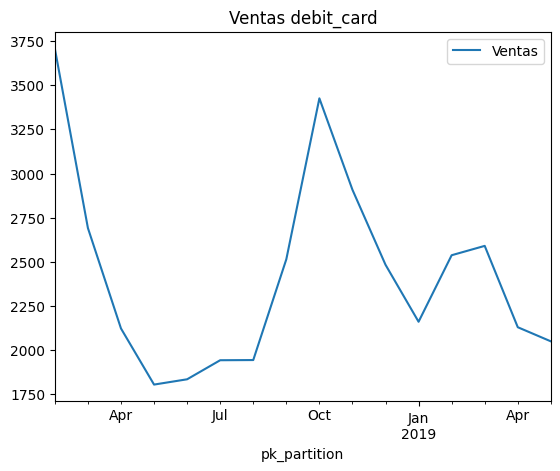

In [54]:
estudio_ventas('debit_card')

Proporción de ventas del pension_plan en el último mes: 0.2859%
Total de clientes en último mes: 425642
Número de ventas en el último mes: 1217


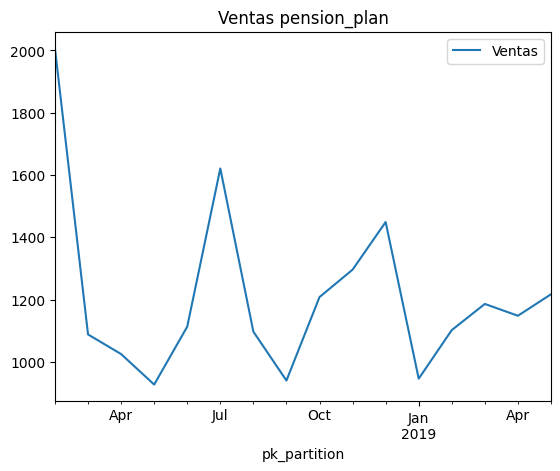

In [55]:
estudio_ventas('pension_plan')

Proporción de ventas del securities en el último mes: 0.0068%
Total de clientes en último mes: 441206
Número de ventas en el último mes: 30


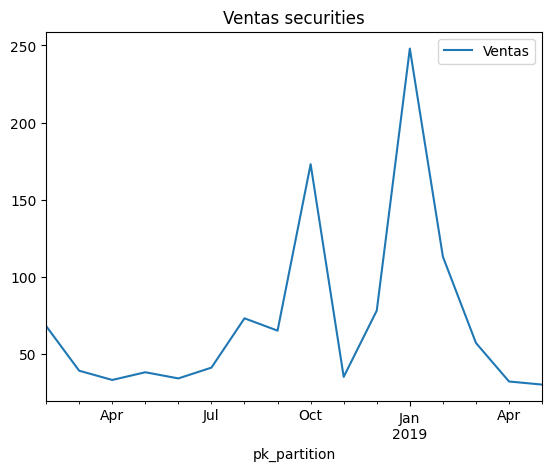

In [56]:
estudio_ventas('securities')

Proporción de ventas del em_acount en el último mes: 1.9493%
Total de clientes en último mes: 146615
Número de ventas en el último mes: 2858


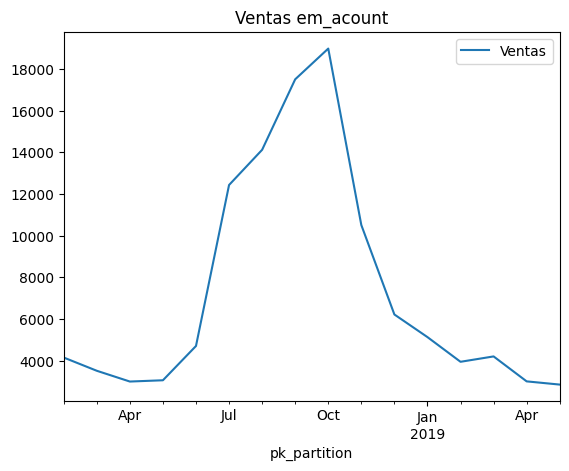

In [57]:
estudio_ventas('em_acount')

Proporción de ventas del payroll en el último mes: 0.2738%
Total de clientes en último mes: 426662
Número de ventas en el último mes: 1168


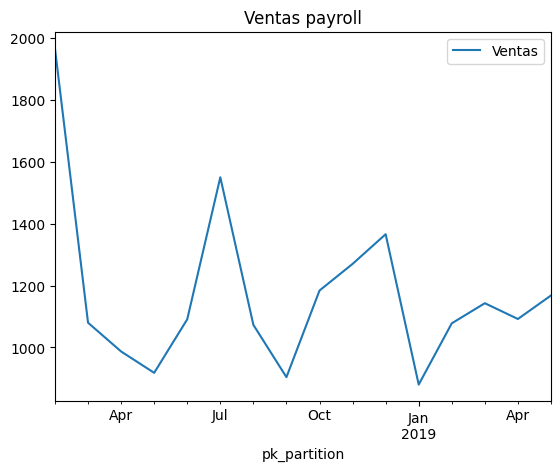

In [58]:
estudio_ventas('payroll')

Proporción de ventas del long_term_deposit en el último mes: 0.0005%
Total de clientes en último mes: 436866
Número de ventas en el último mes: 2


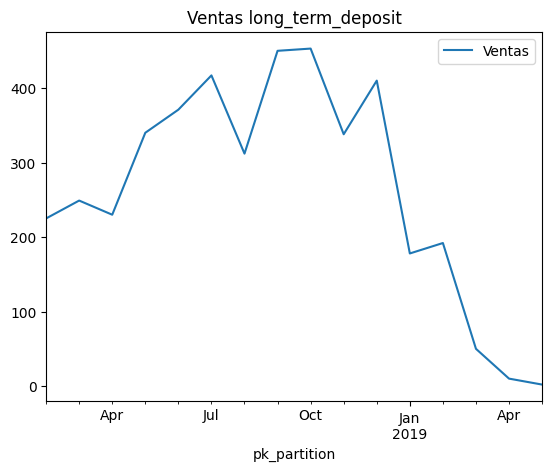

In [59]:
estudio_ventas('long_term_deposit')

<a id='bajas'></a>
# Creación de tabla bajas
[Volver al índice](#index)

En este apartado vamos a crear un dataset que de manera visual nos muestre las bajas e inscipciones que ha tenido cada producto respecto al mes anterior.

Vamos a crear una tabla que informe de el número de nuevos clientes o bajas por cada uno de los productos que hay en la empresa.

In [60]:
customer_products['pk_partition'] = pd.to_datetime(customer_products['pk_partition'])
products = customer_products.sort_values(by='pk_partition')

In [61]:
# no nos interesa quien compra los productos, sino el número de productos que se compran por lo que eliminamos el pk_cid 
mes1 = products[products['pk_partition']=='2018-01-01'].drop('pk_cid',axis=1).reset_index(drop=True)
mes1.head()

,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,2018-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2018-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2018-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2018-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2018-01-01,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [62]:
# obtenemos los datos del primer mes del que tenemos registro del número de clientes que tenemos por producto en dicho mes
inicio = mes1.groupby('pk_partition').sum()
inicio

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
pk_partition,,,,,,,,,,,,,,,
2018-01-01,883,19,15,786,932,4884,0,3325,8145,8835,13478,15320,24696,2,215293


In [63]:
products['pk_partition'].unique()

<DatetimeArray>
['2018-01-01 00:00:00', '2018-02-01 00:00:00', '2018-03-01 00:00:00',
 '2018-04-01 00:00:00', '2018-05-01 00:00:00', '2018-06-01 00:00:00',
 '2018-07-01 00:00:00', '2018-08-01 00:00:00', '2018-09-01 00:00:00',
 '2018-10-01 00:00:00', '2018-11-01 00:00:00', '2018-12-01 00:00:00',
 '2019-01-01 00:00:00', '2019-02-01 00:00:00', '2019-03-01 00:00:00',
 '2019-04-01 00:00:00', '2019-05-01 00:00:00']
Length: 17, dtype: datetime64[ns]

He conseguido sacar las ventas de cada producto en el primer mes del que tenemos registro. Ahora basta con calcular el mismo groupby para el siguiente registro de modo que obtenemos la diferencia con el anterior. Esto deberíamos realizarlo con todos los meses comparando cada uno con el anterior.

In [64]:
lista_meses = ['2018-02-01', '2018-03-01',
 '2018-04-01', '2018-05-01', '2018-06-01',
 '2018-07-01', '2018-08-01', '2018-09-01',
 '2018-10-01', '2018-11-01', '2018-12-01',
 '2019-01-01', '2019-02-01', '2019-03-01',
 '2019-04-01', '2019-05-01']

for mes in lista_meses:
    mes_resumen = products[products['pk_partition']==mes].drop('pk_cid',axis=1).reset_index(drop=True)
    mes_compras = mes_resumen.groupby('pk_partition').sum()
    inicio = pd.concat([inicio,mes_compras],axis=0)

inicio

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
pk_partition,,,,,,,,,,,,,,,
2018-01-01,883,19,15,786,932,4884,0,3325,8145,8835,13478,15320,24696,2,215293
2018-02-01,1343,19,15,872,965,4956,0,3282,8889,9496,14246,15827,25448,2,217098
2018-03-01,1664,23,17,969,965,4965,0,3511,9735,9882,14989,16428,27046,2,218683
2018-04-01,1740,24,17,1084,983,5107,0,3725,9905,10560,15825,16947,27764,2,219816
2018-05-01,1455,27,18,1145,1012,5356,0,3797,9994,10148,16697,17569,27911,2,221291
2018-06-01,1244,27,19,1159,1019,5588,0,4002,10946,11635,15540,17950,28828,2,224328
2018-07-01,1282,28,20,1172,1053,5796,0,4137,11888,12779,16916,18185,29578,2,234324
2018-08-01,1335,29,20,1219,1133,5923,0,4206,11383,12126,18118,18333,29205,2,245980
2018-09-01,1386,31,20,1237,1201,6158,0,4289,11850,12624,18862,18618,31684,2,261210


In [65]:
df_diff = inicio.diff() #calculamos la diferencia entre cada fila y la anterior
#df_diff

In [66]:
df_resultado = inicio.copy() # hacemos una copia del dataframe inicial
df_resultado.iloc[1:] = df_diff.iloc[1:] # cambiamos todas las filas menos la primera por las diferencias

In [67]:
resumen_situacion = df_resultado.drop(columns = ['em_account_pp','em_account_p'])
resumen_situacion

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount
pk_partition,,,,,,,,,,,,,
2018-01-01,883,19,15,786,932,4884,3325,8145,8835,13478,15320,24696,215293
2018-02-01,460,0,0,86,33,72,-43,744,661,768,507,752,1805
2018-03-01,321,4,2,97,0,9,229,846,386,743,601,1598,1585
2018-04-01,76,1,0,115,18,142,214,170,678,836,519,718,1133
2018-05-01,-285,3,1,61,29,249,72,89,-412,872,622,147,1475
2018-06-01,-211,0,1,14,7,232,205,952,1487,-1157,381,917,3037
2018-07-01,38,1,1,13,34,208,135,942,1144,1376,235,750,9996
2018-08-01,53,1,0,47,80,127,69,-505,-653,1202,148,-373,11656
2018-09-01,51,2,0,18,68,235,83,467,498,744,285,2479,15230


In [68]:
# Aplica el gradiente de color por cada columna de forma independiente
resumen_situacion_color = resumen_situacion.iloc[1:].style.background_gradient(cmap='RdYlGn', axis=0)
# Muestra el DataFrame estilizado
resumen_situacion_color

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount
pk_partition,,,,,,,,,,,,,
2018-02-01 00:00:00,460,0,0,86,33,72,-43,744,661,768,507,752,1805
2018-03-01 00:00:00,321,4,2,97,0,9,229,846,386,743,601,1598,1585
2018-04-01 00:00:00,76,1,0,115,18,142,214,170,678,836,519,718,1133
2018-05-01 00:00:00,-285,3,1,61,29,249,72,89,-412,872,622,147,1475
2018-06-01 00:00:00,-211,0,1,14,7,232,205,952,1487,-1157,381,917,3037
2018-07-01 00:00:00,38,1,1,13,34,208,135,942,1144,1376,235,750,9996
2018-08-01 00:00:00,53,1,0,47,80,127,69,-505,-653,1202,148,-373,11656
2018-09-01 00:00:00,51,2,0,18,68,235,83,467,498,744,285,2479,15230
2018-10-01 00:00:00,-12,2,-1,12,147,222,96,604,599,1083,226,2688,16497


# DATASETS BALANCEADOS

<a id='balanceo'></a>
## Dataset balanceado de producto a predecir
[Volver al índice](#index)

En este apartado vamos a elaborar los distintos dataset balanceados (50% no poseeran el producto y 50% habrán comprado dicho producto) que nos serviran para entrenar un modelo de propensión a compra. El modelo será capaz de informarnos de la probabilidad que tiene un cliente de comprar el producto al mes siguiente.

Vamos a proceder a crear una función que nos permita obtener un dataset balanceado sobre el que aplicar un modelo de propensión a compra, es decir, un modelo que nos permita obtener probabilidades sobre nuestros clientes en base a la compra de ciertos productos (los más rentables).

In [69]:
customer_commercial_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           int64         
 1   pk_partition     datetime64[ns]
 2   entry_date       object        
 3   entry_channel    object        
 4   active_customer  float64       
 5   segment          object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 273.0+ MB


In [70]:
customer_products['pk_partition'] = pd.to_datetime(customer_products['pk_partition'], format='%Y-%m')

In [ ]:
customer_products.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1050611,2018-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1050612,2018-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1050613,2018-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1050614,2018-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [72]:
def creacion_df(sales_df,product_df,start_date,end_date,producto):

    # Filtrar el DataFrame de ventas para quedarnos con las fechas seleccionadas
    # escogemos de la tabla de 'sales' los clientes que han comprado el producto en ese intervalo de tiempo
    compras_producto = sales_df[(sales_df['month_sale'] >= start_date) & (sales_df['month_sale'] <= end_date)]
    compras_producto= compras_producto[compras_producto['product_desc']==producto].reset_index()
    # añadimos una nueva columna la cual será el target que informa de si han comprado o no el producto, todos han comprado porque lo sacamos de las ventas
    compras_producto['Compra_'+ producto] = 1
    
    # Filtrar el DataFrame de productos para quedarnos con las fechas seleccionadas y la gente que no ha comprado nunca dicho producto
    # en el periodo de tiempo fijado
    no_producto = product_df[(product_df['pk_partition'] >= start_date) & (product_df['pk_partition'] <= end_date)]
    no_producto = no_producto[no_producto[producto]==0]
    no_producto.reset_index()

    # ahora queremos escoger de manera aleatoria de este dataset el mismo número de clientes que hay en 
    # compras_debit_card para que así esté balanceado

    # 1. Agrupar por 'id_cliente' y tomar una muestra aleatoria de 1 fila dentro de cada grupo
    df_unique_random = no_producto.groupby('pk_cid').apply(lambda x: x.sample(1)).reset_index(drop=True)

    # 2. Obtener un sample aleatorio del mismo tamaño que compras debit_card
    no_producto = df_unique_random.sample(n=len(compras_producto), random_state=42)  # random_state es opcional

    # le añadimos la columna de compra con un 0 que indica que no han comprado dicho producto
    no_producto['Compra_'+ producto] = 0

    # comenzamos eliminando todas las columnas de no_producto que no son pk_cid, pk_partition, nombre_producto
    # y eliminamos las columnas que no aportan información de compras_debit_card porque son iguales todas las filas: product_desc, family_product

    estas_no = ['pk_cid','pk_partition','Compra_'+ producto]
    lista_eliminar = [col for col in no_producto.columns if col not in estas_no]
    no_producto = no_producto.drop(columns=lista_eliminar)

    compras_producto = compras_producto.drop(columns = ['product_desc','family_product','pk_sale','net_margin','index','month_sale','month_sale_year','month_sale_month'])

    # ahora tenemos que añadirle al dataframe no_producto todas las columnas que tiene compras_producto

    fusion1 = pd.merge(no_producto,customer_sociodemographics,how='left',left_on=['pk_cid','pk_partition'],right_on=['pk_cid','pk_partition'])

    fusion2 = pd.merge(fusion1,customer_commercial_activity,how='left',left_on=['pk_cid','pk_partition'],right_on=['pk_cid','pk_partition'])
    no_producto = fusion2

    no_producto['pk_partition_month'] = no_producto['pk_partition'].dt.month
    no_producto['pk_partition_year'] = no_producto['pk_partition'].dt.year

    no_producto['entry_date'] = pd.to_datetime(no_producto['entry_date'],format='%Y-%m')
    no_producto['entry_date_year'] = no_producto['entry_date'].dt.year
    no_producto['entry_date_month'] = no_producto['entry_date'].dt.month

    no_producto['tipo_cliente_bool'] = no_producto['entry_date'] < no_producto['pk_partition']
    no_producto['tipo_cliente'] = np.where(no_producto['tipo_cliente_bool'] == True,'Cliente_existente','Cliente_nuevo')
    no_producto = no_producto.drop('tipo_cliente_bool',axis=1)
    no_producto['cid']=no_producto['pk_cid']
    no_producto = no_producto.drop(columns='pk_cid')

    # por último unimos un dataset que tiene aproximadamente el mismo número de clientes que han comprado y que no el producto
    df_final = pd.concat([compras_producto, no_producto], axis=0)
    df_final = df_final.drop_duplicates(subset=['cid'],keep='first')
    df_final.set_index('cid', inplace=True)
    
    # ordenamos le dataset final por la fecha en la que el cliente ingresó en el database de la empresa
    df_final = df_final.sort_values(by='pk_partition')

    return df_final

<a id='debit_card'></a>
## Dataset balanceado debit_card
[Volver al índice](#index)

En este apartado creamos el dataset balanceado que nos permitirá predecir la probabilidad de compra de debit_card para cada cliente.

In [73]:
debit_card = creacion_df(sales_analysis,customer_products,'2019-01-01','2019-05-01','debit_card').reset_index()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14940\2836990673.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_unique_random = no_producto.groupby('pk_cid').apply(lambda x: x.sample(1)).reset_index(drop=True)


In [74]:
debit_card.head()

,cid,pk_partition,country_id,region_code,gender,age,deceased,salary,entry_date,entry_channel,active_customer,segment,entry_date_year,entry_date_month,pk_partition_year,pk_partition_month,tipo_cliente,Compra_debit_card
0,1397078,2019-01-01,ES,28,V,40,N,72533.43,2018-05-01,KHM,1.0,02 - PARTICULARES,2018,5,2019,1,Cliente_existente,0
1,1392524,2019-01-01,ES,21,V,51,N,NaN,2018-04-01,KHN,1.0,02 - PARTICULARES,2018,4,2019,1,Cliente_existente,1
2,1498089,2019-01-01,ES,30,H,20,N,NaN,2018-11-01,KHQ,0.0,03 - UNIVERSITARIO,2018,11,2019,1,Cliente_existente,0
3,1392403,2019-01-01,ES,30,H,25,N,57991.26,2018-04-01,KHK,1.0,03 - UNIVERSITARIO,2018,4,2019,1,Cliente_existente,1
4,1306855,2019-01-01,ES,28,V,29,N,259830.63,2017-09-01,KFA,0.0,02 - PARTICULARES,2017,9,2019,1,Cliente_existente,0


In [75]:
print(debit_card.shape)
print(debit_card['cid'].nunique())

(22653, 18)
22653


In [76]:
debit_card.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
cid,22653.0,1.335494e+06,189034.502769,22212.00,1197586.000,1380323.0,1.506265e+06,1553649.00
region_code,22653.0,2.598737e+01,13.310684,-1.00,14.000,28.0,3.500000e+01,52.00
age,22653.0,3.303284e+01,12.593345,2.00,23.000,30.0,3.900000e+01,105.00
salary,11650.0,1.186228e+05,264028.710775,5163.75,62277.675,89399.4,1.320854e+05,22034738.76
active_customer,22653.0,6.428288e-01,0.479176,0.00,0.000,1.0,1.000000e+00,1.00
entry_date_year,22653.0,2.017282e+03,1.300442,2015.00,2016.000,2018.0,2.018000e+03,2019.00
entry_date_month,22653.0,7.343575e+00,3.560326,1.00,4.000,8.0,1.000000e+01,12.00
pk_partition_year,22653.0,2.019000e+03,0.000000,2019.00,2019.000,2019.0,2.019000e+03,2019.00
pk_partition_month,22653.0,2.993511e+00,1.395232,1.00,2.000,3.0,4.000000e+00,5.00
Compra_debit_card,22653.0,5.061140e-01,0.499974,0.00,0.000,1.0,1.000000e+00,1.00


In [77]:
# después de revisar que todo funciona de manera correcta
#debit_card.to_pickle('debit_card.pkl')

<a id='pension_plan'></a>
## Dataset balanceado pension_plan
[Volver al índice](#index)

En este apartado creamos el dataset balanceado que nos permitirá predecir la probabilidad de compra de pension_plan para cada cliente.

In [78]:
pension_plan = creacion_df(sales_analysis,customer_products,'2018-08-01','2019-05-01','pension_plan').reset_index()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14940\2836990673.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_unique_random = no_producto.groupby('pk_cid').apply(lambda x: x.sample(1)).reset_index(drop=True)


In [79]:
pension_plan.head()

,cid,pk_partition,country_id,region_code,gender,age,deceased,salary,entry_date,entry_channel,active_customer,segment,entry_date_year,entry_date_month,pk_partition_year,pk_partition_month,tipo_cliente,Compra_pension_plan
0,1039147,2018-08-01,ES,28,V,63,N,63418.77,2015-08-01,KFC,1.0,02 - PARTICULARES,2015,8,2018,8,Cliente_existente,0
1,1292262,2018-08-01,ES,15,H,21,N,NaN,2017-08-01,KHE,1.0,03 - UNIVERSITARIO,2017,8,2018,8,Cliente_existente,0
2,1252681,2018-08-01,ES,28,V,53,N,461904.51,2017-04-01,KFC,0.0,02 - PARTICULARES,2017,4,2018,8,Cliente_existente,0
3,1381877,2018-08-01,ES,28,H,60,N,315656.64,2018-07-01,KFA,1.0,01 - TOP,2018,7,2018,8,Cliente_existente,1
4,1414727,2018-08-01,ES,8,H,20,N,119004.90,2018-07-01,KHQ,1.0,02 - PARTICULARES,2018,7,2018,8,Cliente_existente,0


In [80]:
print(pension_plan.shape)
print(pension_plan['cid'].nunique())

(22884, 18)
22884


In [81]:
pension_plan.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
cid,22884.0,1.304645e+06,181977.909295,24763.00,1.174585e+06,1333516.500,1453021.25,1553688.00
region_code,22884.0,2.608163e+01,13.264512,-1.00,1.400000e+01,28.000,35.00,52.00
age,22884.0,3.216212e+01,11.844305,2.00,2.300000e+01,29.000,38.00,99.00
salary,14136.0,1.156895e+05,126837.186184,5163.75,6.128560e+04,88675.785,132911.34,5431377.63
active_customer,22884.0,6.804317e-01,0.466320,0.00,0.000000e+00,1.000,1.00,1.00
entry_date_year,22884.0,2.017051e+03,1.236414,2015.00,2.016000e+03,2017.000,2018.00,2019.00
entry_date_month,22884.0,7.581585e+00,3.263733,1.00,5.000000e+00,8.000,10.00,12.00
pk_partition_year,22884.0,2.018515e+03,0.499793,2018.00,2.018000e+03,2019.000,2019.00,2019.00
pk_partition_month,22884.0,6.515819e+00,3.807380,1.00,3.000000e+00,5.000,10.00,12.00
Compra_pension_plan,22884.0,5.064237e-01,0.499970,0.00,0.000000e+00,1.000,1.00,1.00


In [82]:
pension_plan.groupby('pk_partition')['cid'].nunique()

pk_partition
2018-08-01    1995
2018-09-01    1866
2018-10-01    2235
2018-11-01    2415
2018-12-01    2593
2019-01-01    2122
2019-02-01    2302
2019-03-01    2380
2019-04-01    2423
2019-05-01    2553
Name: cid, dtype: int64

In [83]:
pension_plan['Compra_pension_plan'].mean()

0.5064237021499738

In [84]:
# después de revisar que todo funciona de manera correcta
pension_plan.to_pickle('pension_plan.pkl')

<a id='long_term_deposit'></a>
## Dataset balanceado long_term_deposit
[Volver al índice](#index)

En este apartado creamos el dataset balanceado que nos permitirá predecir la probabilidad de compra de long_term_deposit para cada cliente.

In [85]:
long_term = creacion_df(sales_analysis,customer_products,'2018-02-01','2019-05-01','long_term_deposit').reset_index()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14940\2836990673.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_unique_random = no_producto.groupby('pk_cid').apply(lambda x: x.sample(1)).reset_index(drop=True)


In [86]:
long_term.head()

,cid,pk_partition,country_id,region_code,gender,age,deceased,salary,entry_date,entry_channel,active_customer,segment,entry_date_year,entry_date_month,pk_partition_year,pk_partition_month,tipo_cliente,Compra_long_term_deposit
0,1380456,2018-02-01,ES,28,H,80,N,130214.07,2018-02-01,KHK,1.0,01 - TOP,2018,2,2018,2,Cliente_nuevo,1
1,1374038,2018-02-01,ES,46,V,44,N,117705.90,2018-01-01,KHK,1.0,02 - PARTICULARES,2018,1,2018,2,Cliente_existente,1
2,1085552,2018-02-01,ES,30,H,24,N,91185.96,2015-10-01,KHE,0.0,03 - UNIVERSITARIO,2015,10,2018,2,Cliente_existente,0
3,1007711,2018-02-01,ES,28,H,47,N,99319.05,2018-01-01,KFA,1.0,02 - PARTICULARES,2018,1,2018,2,Cliente_existente,1
4,1266415,2018-02-01,ES,28,H,56,N,148128.21,2017-07-01,KAT,1.0,02 - PARTICULARES,2017,7,2018,2,Cliente_existente,1


In [87]:
print(long_term.shape)
print(long_term['cid'].nunique())

(8429, 18)
8429


In [88]:
long_term.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
cid,8429.0,1.277853e+06,220871.601016,17799.00,1167151.00,1342855.000,1.407125e+06,1552992.00
region_code,8429.0,2.624629e+01,12.808308,-1.00,15.00,28.000,3.300000e+01,52.00
age,8429.0,4.083011e+01,17.583993,2.00,24.00,38.000,5.200000e+01,101.00
salary,5710.0,1.266930e+05,204469.187933,9188.37,68036.13,98478.375,1.458212e+05,11857856.46
active_customer,8429.0,6.926089e-01,0.461440,0.00,0.00,1.000,1.000000e+00,1.00
entry_date_year,8429.0,2.017081e+03,1.150832,2015.00,2016.00,2017.000,2.018000e+03,2019.00
entry_date_month,8429.0,7.314391e+00,3.292079,1.00,5.00,8.000,1.000000e+01,12.00
pk_partition_year,8429.0,2.018274e+03,0.445942,2018.00,2018.00,2018.000,2.019000e+03,2019.00
pk_partition_month,8429.0,6.380116e+00,3.475422,1.00,3.00,6.000,1.000000e+01,12.00
Compra_long_term_deposit,8429.0,5.014830e-01,0.500027,0.00,0.00,1.000,1.000000e+00,1.00


In [89]:
long_term.groupby('pk_partition')['cid'].nunique()

pk_partition
2018-02-01    372
2018-03-01    405
2018-04-01    371
2018-05-01    458
2018-06-01    496
2018-07-01    657
2018-08-01    548
2018-09-01    702
2018-10-01    725
2018-11-01    648
2018-12-01    739
2019-01-01    531
2019-02-01    560
2019-03-01    406
2019-04-01    402
2019-05-01    409
Name: cid, dtype: int64

In [90]:
long_term['Compra_long_term_deposit'].mean()

0.5014829754419267

In [91]:
# después de revisar que todo funciona de manera correcta
long_term.to_pickle('long_term_deposit.pkl')

<a id='extra'></a>
# Creación de variables extra
[Volver al índice](#index)

En este apartado creamos nuevas variables explicativas a partir de las que ya tenemos. Estas aportaran información útil sobre el cliente.

La información relativa a clientes (sin contar con las compras que realian) se distribuyen en las tablas:

- **customer_commercial_activity**
- **customer_products**
- **customer_sociodemographics**
- **customer_sales**

A partir de la información que podemos encontrar en estas tablas nos disponemos a crear nuevas variables que puedan ayudar de forma significativa a nuestro modelo de predicción a compra y más tarde al modelo de clustering.

## Customer_commercial_activity

In [92]:
customer_commercial_activity.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-01,2018-01,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-01,2015-08,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-01,2015-08,KHE,1.0,03 - UNIVERSITARIO


In [93]:
# 1. Convertimos 'pk_partition' y 'entry_date' a formato de fecha (si aún no lo están)
customer_commercial_activity['pk_partition'] = pd.to_datetime(customer_commercial_activity['pk_partition'], format='%Y-%m')
customer_commercial_activity['entry_date'] = pd.to_datetime(customer_commercial_activity['entry_date'], format='%Y-%m')

# 2. Calculamos la antigüedad en meses
customer_commercial_activity['meses_antigüedad'] = customer_commercial_activity.apply(lambda row: (row['pk_partition'].year - row['entry_date'].year) * 12 + (row['pk_partition'].month - row['entry_date'].month), axis=1)

# 3. Agrupamos por 'pk_cid' y 'pk_partition' para ver la antigüedad de cada cliente en cada mes
meses_antiguedad = customer_commercial_activity.groupby(['pk_cid', 'pk_partition'])['meses_antigüedad'].first().reset_index()

# Mostramos el resultado
meses_antiguedad.head(20)

,pk_cid,pk_partition,meses_antigüedad
0,15891,2018-07-01,0
1,15891,2018-08-01,1
2,16063,2018-11-01,0
3,16063,2018-12-01,1
4,16063,2019-01-01,2
5,16063,2019-02-01,3
6,16063,2019-03-01,4
7,16063,2019-04-01,5
8,16063,2019-05-01,6
9,16203,2018-12-01,0


## Customer_products

In [94]:
customer_products.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1050611,2018-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1050612,2018-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1050613,2018-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1050614,2018-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [95]:
customer_products['total_products'] = customer_products[['credit_card', 'debit_card', 'em_account_p', 'em_account_pp', 
                           'em_acount', 'emc_account', 'funds', 'loans', 'long_term_deposit', 
                           'mortgage', 'payroll', 'payroll_account', 'pension_plan', 
                           'securities', 'short_term_deposit']].sum(axis=1)

In [96]:
customer_products['total_products_no_account'] = customer_products[['credit_card', 'debit_card', 
                           'funds', 'loans', 'long_term_deposit', 
                           'mortgage', 'pension_plan', 
                           'securities', 'short_term_deposit']].sum(axis=1)

In [97]:
sales_analysis.groupby('product_desc')['net_margin'].mean()

product_desc
credit_card             60.016020
debit_card              60.003216
em_acount               69.973792
emc_account             70.012927
funds                 1499.047159
loans                 2183.924000
long_term_deposit     1496.919186
mortgage              2532.510000
payroll                 69.933216
payroll_account         69.968785
pension_plan          5976.435908
securities            1497.833362
short_term_deposit    1486.431322
Name: net_margin, dtype: float64

In [98]:
customer_products['spent_on_account'] = np.round(customer_products['em_acount']*69.973792  + customer_products['payroll']*69.933216 +customer_products['payroll_account']*69.968785 +customer_products['emc_account']*70.012927,2) 
customer_products['spent_on_payment_card'] = np.round(customer_products['debit_card']*60.003216 + customer_products['credit_card']*60.016020,2)
customer_products['spent_on_pension_plan'] = np.round(customer_products['pension_plan']*5976.435908,2) 
customer_products['spent_on_investment'] = np.round(customer_products['short_term_deposit']*1486.431322  + customer_products['long_term_deposit']*1496.919186 +customer_products['securities']*1497.833362 +customer_products['funds']*1499.047159,2) 
customer_products['spent_on_loan'] = np.round(customer_products['loans']*2183.924000  + customer_products['mortgage']*2532.510000,2) 

In [99]:
customer_products[customer_products['pk_partition']=='2019-05'][['pension_plan','spent_on_pension_plan']]

,pension_plan,spent_on_pension_plan
5519929,0,0.00
5519930,0,0.00
5519931,1,5976.44
5519932,0,0.00
5519933,0,0.00
...,...,...
5962919,0,0.00
5962920,0,0.00
5962921,0,0.00
5962922,0,0.00


In [100]:
product_columns = ['credit_card', 'debit_card', 'em_account_p', 'em_account_pp', 'em_acount', 'emc_account', 
                   'funds', 'loans', 'long_term_deposit', 'mortgage', 'payroll', 'payroll_account', 
                   'pension_plan', 'securities', 'short_term_deposit']


# Agrupar por cliente y obtener el máximo valor de cada producto (1 si lo ha tenido alguna vez)
df_posesion = customer_products.groupby(['pk_cid','pk_partition'])[product_columns].sum()


df_posesion['suma'] = df_posesion[product_columns].sum(axis=1)
df_posesion = df_posesion[['suma']]
df_posesion = df_posesion.reset_index()
df_posesion.head(20)

,pk_cid,pk_partition,suma
0,15891,2018-07-01,1
1,15891,2018-08-01,0
2,16063,2018-11-01,0
3,16063,2018-12-01,0
4,16063,2019-01-01,0
5,16063,2019-02-01,0
6,16063,2019-03-01,0
7,16063,2019-04-01,0
8,16063,2019-05-01,0
9,16203,2018-12-01,0


In [101]:
# Obtener el valor máximo de 'suma' por cliente (pk_cid)
df_posesion['max_suma'] = df_posesion.groupby('pk_cid')['suma'].transform('max')

# Filtrar las filas donde 'suma' es igual al valor máximo de productos para cada cliente
df_max_compra = df_posesion[df_posesion['suma'] == df_posesion['max_suma']]

# Obtener la primera fecha donde ocurrió ese valor máximo (es decir, la primera vez que alcanzó esa cantidad de productos)
df_ultima_fecha = df_max_compra.groupby('pk_cid').agg(
    ultima_compra=('pk_partition', 'min')  # Obtener la primera vez que alcanzó el valor máximo
).reset_index()

# Mostrar el resultado
df_ultima_fecha

,pk_cid,ultima_compra
0,15891,2018-07-01
1,16063,2018-11-01
2,16203,2019-01-01
3,16502,2019-01-01
4,17457,2018-09-01
...,...,...
456368,1553685,2019-05-01
456369,1553686,2019-05-01
456370,1553687,2019-05-01
456371,1553688,2019-05-01


In [102]:
# Definir la fecha de referencia 2019-06-01
fecha_actual = pd.to_datetime('2019-06-01')

# Calcular la diferencia en días desde la última compra hasta la fecha de referencia
df_ultima_fecha['days_since_last_purchase'] = (fecha_actual - df_ultima_fecha['ultima_compra']).dt.days

# Convertir la diferencia en días a meses
df_ultima_fecha['months_since_last_purchase'] = df_ultima_fecha['days_since_last_purchase'] // 30

In [103]:
df_posesion = df_posesion.groupby('pk_cid').agg(
    product_posesion=('suma', lambda x: (x > 0).any()),  # True si alguna fila de 'suma' es mayor que 1
    max_products=('suma', 'max')  # El máximo valor de 'suma' para cada 'pk_cid'
).reset_index()

# Mostrar el nuevo DataFrame
df_posesion

,pk_cid,product_posesion,max_products
0,15891,True,1
1,16063,False,0
2,16203,True,1
3,16502,True,2
4,17457,True,3
...,...,...,...
456368,1553685,False,0
456369,1553686,False,0
456370,1553687,False,0
456371,1553688,False,0


In [104]:
products_description

,pk_product_ID,product_desc,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account
5,8871,emc_account,account
6,2312,credit_card,payment_card
7,2335,short_term_deposit,investment
8,2336,long_term_deposit,investment
9,2673,securities,investment


In [105]:
products_description['family_product'].unique()

array(['account', 'payment_card', 'pension_plan', 'investment', 'loan'],
      dtype=object)

In [106]:
# Variable binaria que indique si el cliente tiene cuenta
customer_products['has_account'] = customer_products[['payroll', 'payroll_account', 'em_acount','emc_account','em_account_p', 'em_account_pp']].max(axis=1)

# Variable binaria que indique si el cliente tiene productos que implican deuda (ej. préstamos, tarjetas de crédito, hipoteca).
customer_products['has_payment_card'] = customer_products[['credit_card', 'debit_card']].max(axis=1)

# Variable binaria que indique si el cliente tiene productos que implican deuda (ej. préstamos, tarjetas de crédito, hipoteca).
customer_products['has_pension_plan'] = customer_products[['pension_plan']].max(axis=1)

# Variable binaria que indique si el cliente tiene productos relacionados con ahorro o inversión (fondos, depósitos, valores, etc.)
customer_products['has_investment'] = customer_products[['short_term_deposit', 'long_term_deposit', 'securities', 'funds']].max(axis=1)

# Variable binaria que indique si el cliente tiene productos que implican deuda (ej. préstamos, tarjetas de crédito, hipoteca).
customer_products['has_loan'] = customer_products[['loans', 'mortgage']].max(axis=1)

In [107]:
# Variable binaria que indique si el cliente tiene productos que implican deuda (ej. préstamos, tarjetas de crédito, hipoteca).
customer_products['has_credit_card_debt'] = customer_products[['credit_card', 'loans', 'mortgage']].max(axis=1)
customer_products['has_credit_card_debt'].value_counts()

has_credit_card_debt
0    5891611
1      71313
Name: count, dtype: int64

In [108]:
# variable que captura el número de cuentas "easyMoney" que tiene un cliente

customer_products['num_accounts'] = customer_products[['em_account_p', 'em_account_pp', 'em_acount', 'emc_account', 'payroll_account','payroll']].sum(axis=1)
customer_products['num_accounts'].value_counts()

num_accounts
1    4397533
0    1169701
2     343726
3      49037
4       2927
Name: count, dtype: int64

In [109]:
# Variable que indique el número de productos que implican deuda tiene un cliente(ej. préstamos, tarjetas de crédito, hipoteca).

customer_products['num_debt_products'] = customer_products[['credit_card', 'loans', 'mortgage']].sum(axis=1)
customer_products['num_debt_products'].value_counts()

num_debt_products
0    5891611
1      70968
2        345
Name: count, dtype: int64

In [110]:
productos = products_description['product_desc'].to_list()
productos

['em_acount',
 'debit_card',
 'pension_plan',
 'payroll',
 'payroll_account',
 'emc_account',
 'credit_card',
 'short_term_deposit',
 'long_term_deposit',
 'securities',
 'funds',
 'loans',
 'mortgage']

In [111]:
# creamos función que nos crea un dataframe cuyas columnas nos indican cuántos meses consecutivos un 
# cliente ha tenido un producto en base a las particiones mensuales

def calculate_consecutive_months(df, products):
    # Crear una copia del dataframe para no modificar el original
    df_result = df[['pk_cid', 'pk_partition']].copy()

    # Asegurarse de que el dataframe esté ordenado por cliente y partición
    df = df.sort_values(by=['pk_cid', 'pk_partition'])

    for product in products:
        # Crear columna desplazada para comparar con el mes anterior
        df[f'{product}_shifted'] = df.groupby('pk_cid')[product].shift(1).fillna(0)

        # Crear columna de cambio cuando el producto cambia de estado (de tenerlo a no tenerlo y viceversa)
        df[f'{product}_change'] = (df[product] != df[f'{product}_shifted']).astype(int)

        # Crear un grupo que se incremente cada vez que cambie el estado del producto
        df[f'{product}_group'] = df.groupby('pk_cid')[f'{product}_change'].cumsum()

        # Contar los meses consecutivos dentro de cada grupo
        df[f'{product}_consecutive_months'] = df.groupby(['pk_cid', f'{product}_group']).cumcount() + 1

        # Si no tiene el producto, asignar 0 meses consecutivos
        df[f'{product}_consecutive_months'] = df.apply(lambda row: 0 if row[product] == 0 else row[f'{product}_consecutive_months'], axis=1)

        # Añadir la columna de meses consecutivos al resultado final
        df_result[f'{product}_consecutive_months'] = df[f'{product}_consecutive_months']
    
    return df_result

In [112]:
meses_producto = calculate_consecutive_months(customer_products,productos)
meses_producto

,pk_cid,pk_partition,em_acount_consecutive_months,debit_card_consecutive_months,pension_plan_consecutive_months,payroll_consecutive_months,payroll_account_consecutive_months,emc_account_consecutive_months,credit_card_consecutive_months,short_term_deposit_consecutive_months,long_term_deposit_consecutive_months,securities_consecutive_months,funds_consecutive_months,loans_consecutive_months,mortgage_consecutive_months
0,1375586,2018-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1050611,2018-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1050612,2018-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1050613,2018-01-01,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1050614,2018-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962919,1166765,2019-05-01,17,0,0,0,0,0,0,0,0,0,0,0,0
5962920,1166764,2019-05-01,17,0,0,0,0,0,0,0,0,0,0,0,0
5962921,1166763,2019-05-01,17,0,0,0,0,0,0,0,0,0,0,0,0
5962922,1166789,2019-05-01,17,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
customer_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 32 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   pk_cid                     int64         
 1   pk_partition               datetime64[ns]
 2   short_term_deposit         int64         
 3   loans                      int64         
 4   mortgage                   int64         
 5   funds                      int64         
 6   securities                 int64         
 7   long_term_deposit          int64         
 8   em_account_pp              int64         
 9   credit_card                int64         
 10  payroll                    int32         
 11  pension_plan               int32         
 12  payroll_account            int64         
 13  emc_account                int64         
 14  debit_card                 int64         
 15  em_account_p               int64         
 16  em_acount                  int64    

## Customer_sociodemographics

In [114]:
customer_sociodemographics.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-01,ES,29,H,35,N,87218.10
1,1050611,2018-01-01,ES,13,V,23,N,35548.74
2,1050612,2018-01-01,ES,13,V,23,N,122179.11
3,1050613,2018-01-01,ES,50,H,22,N,119775.54
4,1050614,2018-01-01,ES,50,V,23,N,NaN


In [115]:
customer_sociodemographics['age'].describe()

count    5.962924e+06
mean     2.976042e+01
std      1.198038e+01
min      2.000000e+00
25%      2.200000e+01
50%      2.500000e+01
75%      3.400000e+01
max      1.050000e+02
Name: age, dtype: float64

In [116]:
def categorize_age(age):
    if age < 25:
        return '18-24'
    elif age < 35:
        return '25-34'
    elif age < 45:
        return '35-44'
    elif age < 55:
        return '45-54'
    else:
        return '55+'
    
# variable que agrupa los clientes en 5 grupos de edad diferentes
customer_sociodemographics['age_group'] = customer_sociodemographics['age'].apply(categorize_age)

In [117]:
# variable que agrupa los salarios en tres categorías
customer_sociodemographics['salary_bracket'] = pd.qcut(customer_sociodemographics['salary'], q=3, labels=['low', 'medium', 'high'])
customer_sociodemographics['salary_bracket'].value_counts(dropna=False)

salary_bracket
NaN       1541104
low       1473955
high      1473933
medium    1473932
Name: count, dtype: int64

Variables extra que se me ocurren en caso de que los modelos sean malos:
- inferir que región de españa se trata cada número y ver el salario en las mismas para ver si es mayor o menor que en dicha provincia, la población y otros estadísticos
- realizar lo mismo pero con los países

## Sales

In [118]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   pk_sale     240773 non-null  int64         
 1   cid         240773 non-null  int64         
 2   month_sale  240773 non-null  datetime64[ns]
 3   product_ID  240773 non-null  int64         
 4   net_margin  240773 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 9.2 MB


In [119]:
gasto_cliente = pd.DataFrame(sales.groupby('cid')['net_margin'].sum().reset_index())
gasto_cliente = gasto_cliente.rename(columns={'cid': 'pk_cid', 'net_margin': 'total_spend'})
gasto_cliente

,pk_cid,total_spend
0,15891,66.4
1,16203,96.7
2,16502,132.9
3,17457,56.0
4,17970,879.8
...,...,...
152749,1553456,56.7
152750,1553541,66.5
152751,1553559,73.0
152752,1553565,82.3


# TABLAS INFO_CLIENTES



<a id='info_debit'></a>
## Creación tabla info_clientes para debit_card
[Volver al índice](#index)

En este apartado creamos una tabla con toda la información de los clientes para entrenar el modelo de propensión de debit card y el de segmentación.
Esta tabla recopila toda la información de los clientes desde **2019-01-01** hasta **2019-05-01**, es decir, la información que tenemos del año actual de los clientes.

Pasamos a crear una tabla llamada info_clientes, la cual va a reunir toda la información disponible de cada cliente. Para ello deberemos unir las diferentes columnas obtenidas a partir de las ya existentes bajo un mismo dataset. Esta tabla reunirá la información desde el inicio del año 2019 hasta la última fecha de la cual tenemos registro.

In [120]:
start_date = '2019-01-01'
end_date = '2019-06-01'

customer_sociodemographics_actual = customer_sociodemographics[(customer_sociodemographics['pk_partition'] >= start_date) & (customer_sociodemographics['pk_partition'] <= end_date)]

meses_producto_actual = meses_producto[(meses_producto['pk_partition'] >= start_date) & (meses_producto['pk_partition'] <= end_date)]

customer_products_actual = customer_products[(customer_products['pk_partition'] >= start_date) & (customer_products['pk_partition'] <= end_date)]

customer_commercial_activity_actual = customer_commercial_activity[(customer_commercial_activity['pk_partition'] >= start_date) & (customer_commercial_activity['pk_partition'] <= end_date)]


In [121]:
info_clientes = pd.merge(customer_sociodemographics_actual,meses_producto_actual,how='left',left_on=['pk_cid','pk_partition'],right_on=['pk_cid','pk_partition'])
print(info_clientes.shape)
info_clientes = pd.merge(info_clientes,customer_products_actual,how='left',left_on=['pk_cid','pk_partition'],right_on=['pk_cid','pk_partition'])
print(info_clientes.shape)
info_clientes = pd.merge(info_clientes,customer_commercial_activity_actual,how='left',left_on=['pk_cid','pk_partition'],right_on=['pk_cid','pk_partition'])
print(info_clientes.shape)
info_clientes = pd.merge(info_clientes,gasto_cliente,how='left',left_on=['pk_cid'],right_on=['pk_cid'])
print(info_clientes.shape)
info_clientes = pd.merge(info_clientes,df_ultima_fecha,how='left',left_on=['pk_cid'],right_on=['pk_cid'])
print(info_clientes.shape)
info_clientes = pd.merge(info_clientes,df_posesion,how='left',left_on=['pk_cid'],right_on=['pk_cid'])
print(info_clientes.shape)

(2177407, 23)
(2177407, 53)
(2177407, 58)
(2177407, 59)
(2177407, 62)
(2177407, 64)


In [122]:
info_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177407 entries, 0 to 2177406
Data columns (total 64 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   pk_cid                                 int64         
 1   pk_partition                           datetime64[ns]
 2   country_id                             object        
 3   region_code                            int32         
 4   gender                                 object        
 5   age                                    int64         
 6   deceased                               object        
 7   salary                                 float64       
 8   age_group                              object        
 9   salary_bracket                         category      
 10  em_acount_consecutive_months           int64         
 11  debit_card_consecutive_months          int64         
 12  pension_plan_consecutive_months        int64         
 1

In [123]:
info_clientes.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,age_group,salary_bracket,em_acount_consecutive_months,debit_card_consecutive_months,pension_plan_consecutive_months,payroll_consecutive_months,payroll_account_consecutive_months,emc_account_consecutive_months,credit_card_consecutive_months,short_term_deposit_consecutive_months,long_term_deposit_consecutive_months,securities_consecutive_months,funds_consecutive_months,loans_consecutive_months,mortgage_consecutive_months,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,total_products,total_products_no_account,spent_on_account,spent_on_payment_card,spent_on_pension_plan,spent_on_investment,spent_on_loan,has_account,has_payment_card,has_pension_plan,has_investment,has_loan,has_credit_card_debt,num_accounts,num_debt_products,entry_date,entry_channel,active_customer,segment,meses_antigüedad,total_spend,ultima_compra,days_since_last_purchase,months_since_last_purchase,product_posesion,max_products
0,1432296,2019-01-01,ES,3,V,20,N,34745.28,18-24,low,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,69.97,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,2018-08-01,KHQ,0.0,03 - UNIVERSITARIO,5,70.7,2018-08-01,304,10,True,1
1,1432294,2019-01-01,ES,12,H,25,N,184449.27,25-34,high,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,69.97,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,2018-08-01,KHQ,1.0,03 - UNIVERSITARIO,5,85.2,2018-08-01,304,10,True,1
2,1432293,2019-01-01,ES,8,H,20,N,67044.99,18-24,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2018-08-01,KHQ,0.0,03 - UNIVERSITARIO,5,NaN,2018-08-01,304,10,False,0
3,1432292,2019-01-01,ES,3,V,23,N,42478.02,18-24,low,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,69.97,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,2018-08-01,KHQ,0.0,03 - UNIVERSITARIO,5,67.1,2018-08-01,304,10,True,1
4,1432297,2019-01-01,ES,45,H,20,N,89482.35,18-24,medium,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,69.97,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,2018-08-01,KHQ,0.0,03 - UNIVERSITARIO,5,91.9,2018-08-01,304,10,True,1


In [124]:
info_clientes.to_pickle('info_clientes.pkl')

In [125]:
info_clientes['realiza_compra'] = info_clientes['pk_cid'].isin(sales_analysis['cid']).astype(int)

In [126]:
info_clientes[['pk_cid','realiza_compra']].head()

,pk_cid,realiza_compra
0,1432296,1
1,1432294,1
2,1432293,0
3,1432292,1
4,1432297,1


In [127]:
info_clientes['realiza_compra'].sum()

726303

Pasamos a crear una tabla llamada info_clientes, la cual va a reunir toda la información disponible de cada cliente. Para ello deberemos unir las diferentes columnas obtenidas a partir de las ya existentes bajo un mismo dataset. Esta tabla reunirá la información desde el inicio del año 2019 hasta la última fecha de la cual tenemos registro.

<a id='info_pension'></a>
## Creación tabla info_clientes para pension_plan y long_term_deposit
[Volver al índice](#index)

En este apartado creamos una tabla con toda la información de los clientes para entrenar el modelo de propensión de debit card y el de segmentación.
Esta tabla recopila toda la información de los clientes desde **2018-02-01** hasta **2019-05-01**, es decir, la información que tenemos del año actual de los clientes.
Pasamos a crear una tabla llamada info_clientes, la cual va a reunir toda la información disponible de cada cliente. Para ello deberemos unir las diferentes columnas obtenidas a partir de las ya existentes bajo un mismo dataset. Esta tabla reunirá la información desde el inicio del año 2019 hasta la última fecha de la cual tenemos registro.

In [105]:
start_date = '2018-01-01'
end_date = '2019-06-01'

customer_sociodemographics_actual = customer_sociodemographics[(customer_sociodemographics['pk_partition'] >= start_date) & (customer_sociodemographics['pk_partition'] <= end_date)]

meses_producto_actual = meses_producto[(meses_producto['pk_partition'] >= start_date) & (meses_producto['pk_partition'] <= end_date)]

customer_products_actual = customer_products[(customer_products['pk_partition'] >= start_date) & (customer_products['pk_partition'] <= end_date)]

customer_commercial_activity_actual = customer_commercial_activity[(customer_commercial_activity['pk_partition'] >= start_date) & (customer_commercial_activity['pk_partition'] <= end_date)]


In [106]:
info_clientes_2 = pd.merge(customer_sociodemographics_actual,meses_producto_actual,how='left',left_on=['pk_cid','pk_partition'],right_on=['pk_cid','pk_partition'])
print(info_clientes_2.shape)
info_clientes_2 = pd.merge(info_clientes_2,customer_products_actual,how='left',left_on=['pk_cid','pk_partition'],right_on=['pk_cid','pk_partition'])
print(info_clientes_2.shape)
info_clientes_2 = pd.merge(info_clientes_2,customer_commercial_activity_actual,how='left',left_on=['pk_cid','pk_partition'],right_on=['pk_cid','pk_partition'])
print(info_clientes_2.shape)
info_clientes_2 = pd.merge(info_clientes_2,gasto_cliente,how='left',left_on=['pk_cid'],right_on=['pk_cid'])
print(info_clientes_2.shape)
info_clientes_2 = pd.merge(info_clientes_2,df_ultima_fecha,how='left',left_on=['pk_cid'],right_on=['pk_cid'])
print(info_clientes_2.shape)
info_clientes_2 = pd.merge(info_clientes_2,df_posesion,how='left',left_on=['pk_cid'],right_on=['pk_cid'])
print(info_clientes_2.shape)

(5962924, 23)
(5962924, 53)
(5962924, 58)
(5962924, 59)
(5962924, 62)
(5962924, 64)


In [107]:
info_clientes_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 64 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   pk_cid                                 int64         
 1   pk_partition                           datetime64[ns]
 2   country_id                             object        
 3   region_code                            int32         
 4   gender                                 object        
 5   age                                    int64         
 6   deceased                               object        
 7   salary                                 float64       
 8   age_group                              object        
 9   salary_bracket                         category      
 10  em_acount_consecutive_months           int64         
 11  debit_card_consecutive_months          int64         
 12  pension_plan_consecutive_months        int64         
 1

In [108]:
# vamos a eliminar aquellas columnas que no vamos a tener en cuenta para el modelo para así disminuir el tamaño del pkl

eliminar_columnas = ['spent_on_account','spent_on_payment_card','spent_on_pension_plan','spent_on_investment','spent_on_loan','em_acount', 'debit_card', 
                     'payroll','payroll_account', 'emc_account', 'credit_card','short_term_deposit', 
                     'securities', 'funds','loans', 'mortgage','age_group','salary_bracket']

In [109]:
info_clientes_2 = info_clientes_2.drop(columns = eliminar_columnas)

In [110]:
info_clientes_2.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,em_acount_consecutive_months,debit_card_consecutive_months,pension_plan_consecutive_months,payroll_consecutive_months,payroll_account_consecutive_months,emc_account_consecutive_months,credit_card_consecutive_months,short_term_deposit_consecutive_months,long_term_deposit_consecutive_months,securities_consecutive_months,funds_consecutive_months,loans_consecutive_months,mortgage_consecutive_months,long_term_deposit,em_account_pp,pension_plan,em_account_p,total_products,total_products_no_account,has_account,has_payment_card,has_pension_plan,has_investment,has_loan,has_credit_card_debt,num_accounts,num_debt_products,entry_date,entry_channel,active_customer,segment,meses_antigüedad,total_spend,ultima_compra,days_since_last_purchase,months_since_last_purchase,product_posesion,max_products
0,1375586,2018-01-01,ES,29,H,35,N,87218.10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,2018-01-01,KHL,1.0,02 - PARTICULARES,0,56.9,2018-05-01,396,13,True,2
1,1050611,2018-01-01,ES,13,V,23,N,35548.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,2015-08-01,KHE,0.0,03 - UNIVERSITARIO,29,NaN,2018-01-01,516,17,True,1
2,1050612,2018-01-01,ES,13,V,23,N,122179.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,2015-08-01,KHE,0.0,03 - UNIVERSITARIO,29,NaN,2018-01-01,516,17,True,1
3,1050613,2018-01-01,ES,50,H,22,N,119775.54,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,2015-08-01,KHD,0.0,03 - UNIVERSITARIO,29,NaN,2018-01-01,516,17,True,1
4,1050614,2018-01-01,ES,50,V,23,N,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,2015-08-01,KHE,1.0,03 - UNIVERSITARIO,29,NaN,2018-01-01,516,17,True,1


In [111]:
col_null = info_clientes_2.isna().sum()
col_withnull = col_null[col_null > 0]

In [112]:
info_clientes_2.to_pickle('info_clientes_2.pkl')